In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Preprocessing Data

In [26]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

# Handling missing values by using mean

In [27]:
df.RAD.mean()

9.549407114624506

In [28]:
df.CRIM.fillna(df1.CRIM.mean(),inplace=True)

In [29]:
df.isnull().sum()

CRIM        0
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

# Exploring the data 

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'ZN'}, xlabel='ZN', ylabel='Density'>

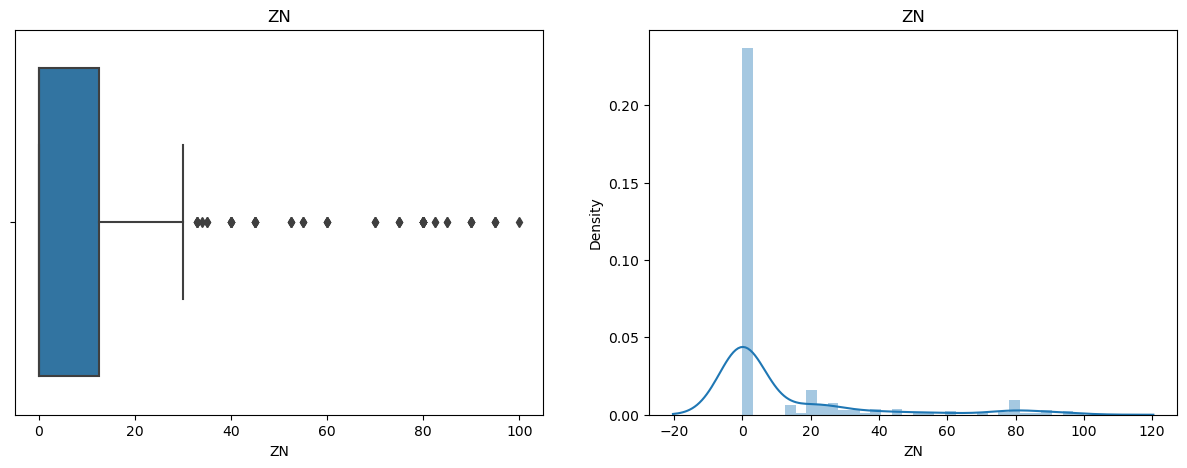

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("ZN")
sns.boxplot(df.ZN)
plt.subplot(1,2,2)
plt.title("ZN")
sns.distplot(df.ZN)

# Handling Outliers

In [31]:
q1=df.ZN.quantile(0.25)
q3=df.ZN.quantile(0.75)
iqr=q3-q1

upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)


In [32]:
#Number of Outliers in ZN
df.loc[(df.ZN>upper_limit)|(df.ZN<lower_limit)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,NaN,26.6
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1


In [33]:
df.loc[(df.ZN>upper_limit,"ZN")]=upper_limit
df.loc[(df.ZN<lower_limit,"ZN")]=lower_limit

# Splitting dataset

In [36]:
x = df.drop(columns=['MEDV'], axis=1)
y = df['MEDV']

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)